In [1]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiPoleModel
import smtf_utility as util


TensorFlow version: 2.15.0


In [2]:
sim = util.bf_simulator([1, 1.33, 1.66, 1.99], 30, scale=1e9)
sim.add_dipole(0.5, 0,0,1,0,0)
sim.add_dipole(0,0.25,0,0,2,0)
sim.add_dipole(0,0,.15,0,0,3)

positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [3]:
model = MultiPoleModel(moments=3, lrate=0.0009, optimizer='rmsprop', loss='mae', scale=1e9, early_stop=False, target_stop=2)
test_epochs = 2000

In [4]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 121.11356
epoch  1 --- Loss --- 116.22991
epoch  2 --- Loss --- 111.44623
epoch  3 --- Loss --- 106.740105
epoch  4 --- Loss --- 102.12707
epoch  5 --- Loss --- 97.582275
epoch  6 --- Loss --- 93.10064
epoch  7 --- Loss --- 89.052475
epoch  8 --- Loss --- 85.21667
epoch  9 --- Loss --- 81.398384
epoch  10 --- Loss --- 77.57404
epoch  11 --- Loss --- 73.77675
epoch  12 --- Loss --- 69.998886
epoch  13 --- Loss --- 66.256134
epoch  14 --- Loss --- 62.679436
epoch  15 --- Loss --- 59.329594
epoch  16 --- Loss --- 55.960526
epoch  17 --- Loss --- 53.016857
epoch  18 --- Loss --- 50.176586
epoch  19 --- Loss --- 47.64765
epoch  20 --- Loss --- 45.196274
epoch  21 --- Loss --- 42.96403
epoch  22 --- Loss --- 41.120132
epoch  23 --- Loss --- 39.245792
epoch  24 --- Loss --- 37.280922
epoch  25 --- Loss --- 35.533062
epoch  26 --- Loss --- 34.177258
epoch  27 --- Loss --- 33.078205
epoch  28 --- Loss --- 32.063015
epoch  29 --- Loss --- 31.495811
epoch  30 --- Loss --- 31

In [5]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 21.62082116206487 minutes


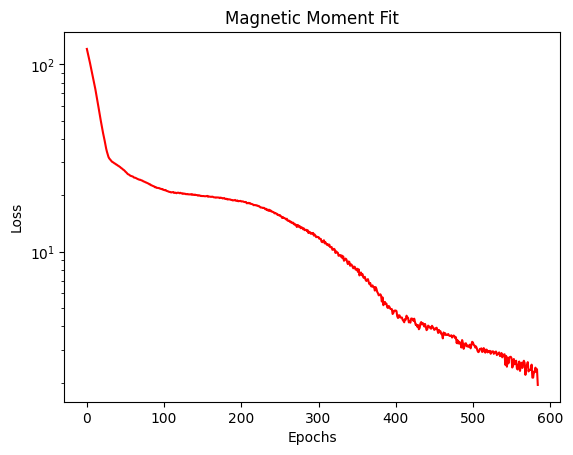

In [6]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [7]:
model.moment()

---- Moment  0 -----
Position:  [[-0.0183361   0.25831386 -0.01328514]]
Value:     [[0.14296699 1.8216819  0.19342434]]
---- Moment  1 -----
Position:  [[-0.00475603 -0.0254124   0.15880649]]
Value:     [[-0.06864417  0.16197914  2.6610165 ]]
---- Moment  2 -----
Position:  [[ 0.5123458  -0.00381165 -0.03213234]]
Value:     [[0.92047167 0.00103009 0.13298644]]
